# Limpieza del documento HISTORICO CNA CANACERO.xlsx

In [28]:
#Importación de librerías 
import pandas as pd

In [29]:
# Leemos todas las hojas
historicoCanacero = pd.read_excel("HISTORICO CNA CANACERO.xlsx", sheet_name= None)

In [30]:
data_total = pd.DataFrame()

In [31]:
x = 2012
while x < 2024:
    name = "Mes Def "+str(x)
    hoja = historicoCanacero[name]
    datos = hoja.copy()
    datos.columns = datos.iloc[2]
    datos = datos[4:]
    datos2 = datos.copy()
    datos = datos.iloc[:52,37:49]
    datos["Producto"] = datos2.iloc[:,0]
    melted = pd.melt(datos,id_vars="Producto", value_vars=["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"],var_name="Mes",value_name="Toneladas")
    melted["Año"] = x
    data_total = pd.concat([data_total, melted], ignore_index=True)
    x += 1


In [32]:
data_total = data_total[['Producto', "Toneladas", 'Mes',"Año"]]
data_total.head()

,Producto,Toneladas,Mes,Año
0,TOTAL MATERIAS PRIMAS,2679404.183812,Ene,2012
1,Mineral de Hierro,703658.985377,Ene,2012
2,Carbón Mineral,1238607.498147,Ene,2012
3,Coque,208494.98104,Ene,2012
4,Chatarra,527056.755448,Ene,2012


In [33]:
data_total['Toneladas'] = pd.to_numeric(data_total['Toneladas'], errors='coerce')

In [34]:
for col in data_total.select_dtypes(include=['object', 'string']):
    data_total[col] = data_total[col].str.replace('\t', '', regex=True).str.strip()

In [35]:
# Definamos categorías 
MateriasPrimas = ["Mineral de Hierro",
   "Carbón Mineral",
   "Coque",
   "Chatarra",
   "Material Relaminable","TOTAL MATERIAS PRIMAS"]

Acero = ["Horno Eléctrico",
   "Convertidor al Oxígeno","ACERO"]

Basicos = ["HIERRO DE PRIMERA FUSIÓN",
   "Arrabio",
   "Fierro Esponja",
   "Ferroaleaciones",
   "Granallas y Polvos","BÁSICOS"]

Semiterminados  = ["Planchón",
   "Lingotes, Palanquillas, etc.","SEMITERMINADOS"]

Planos = ["Placa",
    "en Rollo",
    "en Hoja",
    "Lámina en Caliente",
    "Lámina en Frío",
    "Lámina con Recubrimiento",
    "Lámina Galvanizada",
    "Lámina Estañada (Hojalata)",
    "Lámina Cromada",
    "Planos con Otros Recubiertos y Trabajos",
    "Planos de Acero al Silicio",
    "Planos de Acero Aleado",
    "Planos de Acero Inoxidable",
    "Cintas, Tiras y Flejes","PLANOS"]

Largos = ["Alambrón",
    "Alambre y derivados",
    "Alambre",
    "Derivados de alambre",
    "Varilla Corrugada",
    "Perfiles Estructurales (Caliente y Frío)",
    "Caliente",
    "Frío",
    "Perfiles Comerciales formados en Caliente",
    "Barras",
    "Perfiles Inoxidables y Aleados",
   "Rieles","LARGOS"]

Terminados = ["TUBOS CON Y SIN COSTURA",
    "Tubos sin Costura",
    "Tubos con Costura",
    "Tubos c/Costura ≤ 406.4 mm",
    "Tubos c/Costura > 406.4 mm","TERMINADOS"]

In [36]:
# Diccionario

grupo_dict = {}
for item in MateriasPrimas:
    grupo_dict[item] = 'Materias Primas'
for item in Acero:
    grupo_dict[item] = 'Acero'
for item in Basicos:
    grupo_dict[item] = 'Básicos'
for item in Semiterminados:
    grupo_dict[item] = 'Semiterminados'
for item in Planos:
    grupo_dict[item] = 'Planos'
for item in Largos:
    grupo_dict[item] = 'Largos'
for item in Terminados:
    grupo_dict[item] = 'Terminados'


In [37]:
data_total['Categoría'] = data_total['Producto'].map(grupo_dict)

In [38]:
valores_a_quitar = ["TOTAL MATERIAS PRIMAS", "ACERO", "BÁSICOS","SEMITERMINADOS","PLANOS","LARGOS","TERMINADOS"]
data_total = data_total[~data_total['Producto'].isin(valores_a_quitar)]

In [39]:
data_total.shape

(6480, 5)

# Análisis Descriptivo

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt



In [41]:
data_total.groupby("Categoría").describe()

Toneladas                                               \
                    count           mean            std            min   
Categoría                                                                
Acero               240.0       0.000000       0.000000       0.000000   
Básicos             720.0  344353.070450  326575.116560    2044.282201   
Largos             1728.0   95116.556729   94437.330533  -13675.396184   
Materias Primas     720.0  538740.416084  502934.283159 -645374.882927   
Planos             2016.0  150082.199606  141067.241982  -16369.615970   
Semiterminados      288.0  211977.068303  164010.026131  -50566.025725   
Terminados          720.0   60734.343859   41167.804271   -8404.371215   

                                                                            \
                           25%            50%            75%           max   
Categoría                                                                    
Acero                 0.000000       0.000000       0.000000  0.000000e+00   
Básicos           20606.437393  363220.871788  547521.327503  1.088803e+06   
Largos             3788.924378   75649.351581  162799.293410  3.975363e+05   
Materias Primas  123973.107555  495046.008809  827575.729503  2.206895e+06   
Planos            18446.943357  103681.880998  289243.339871  4.797996e+05   
Semiterminados   136117.113450  196999.180691  283756.564132  7.351184e+05   
Terminados        33064.220256   49710.495123   83795.676902  2.296013e+05   

                    Año                                                      \
                  count    mean       std     min      25%     50%      75%   
Categoría                                                                     
Acero             288.0  2017.5  3.458061  2012.0  2014.75  2017.5  2020.25   
Básicos           720.0  2017.5  3.454452  2012.0  2014.75  2017.5  2020.25   
Largos           1728.0  2017.5  3.453052  2012.0  2014.75  2017.5  2020.25   
Materias Primas   720.0  2017.5  3.454452  2012.0  2014.75  2017.5  2020.25   
Planos           2016.0  2017.5  3.452909  2012.0  2014.75  2017.5  2020.25   
Semiterminados    288.0  2017.5  3.458061  2012.0  2014.75  2017.5  2020.25   
Terminados        720.0  2017.5  3.454452  2012.0  2014.75  2017.5  2020.25   

                         
                    max  
Categoría                
Acero            2023.0  
Básicos          2023.0  
Largos           2023.0  
Materias Primas  2023.0  
Planos           2023.0  
Semiterminados   2023.0  
Terminados       2023.0

In [42]:
data_total.groupby("Año").describe()

Toneladas                                                             \
         count           mean            std            min           25%   
Año                                                                         
2012     540.0  178440.170998  303331.254828 -100438.271093  11057.763672   
2013     540.0  168950.127284  305473.252392 -645374.882927  11180.728473   
2014     540.0  195419.971634  312664.467524 -220102.661312  11294.158161   
2015     540.0  189340.035476  262029.957840  -13057.561521  11454.212046   
2016     540.0  198356.177684  285395.729791  -10732.027569  12259.789650   
2017     540.0  205234.530566  283303.896672  -12743.859816  15960.343355   
2018     540.0  207245.666428  299486.064919   -8582.104842  12313.151401   
2019     540.0  196337.207888  280936.963509   -9298.950159  15772.609367   
2020     540.0  151231.696731  192170.580985  -72266.914175  12181.068593   
2021     540.0  173402.198901  213026.604969  -13593.476193  14726.722602   
2022     516.0  187796.159001  224229.903080  -10343.511571  22681.162443   
2023     516.0  201729.722493  231955.734685   -9014.651389  23379.772995   

                                                  
                50%            75%           max  
Año                                               
2012   80636.866504  215603.964683  2.126357e+06  
2013   70106.920979  213244.996621  2.206895e+06  
2014   86412.566515  262754.873730  1.976934e+06  
2015  101761.726459  274694.563100  1.497524e+06  
2016   95074.085924  302850.656407  1.692557e+06  
2017  106785.444910  299258.465898  1.759775e+06  
2018   86589.407789  292194.754557  1.728508e+06  
2019   87609.963190  279629.883357  1.555605e+06  
2020   70364.120892  233921.888951  9.530279e+05  
2021   84474.594848  261725.164058  1.017624e+06  
2022   95321.062225  296246.424755  9.980427e+05  
2023  119007.687827  344549.494609  1.055044e+06

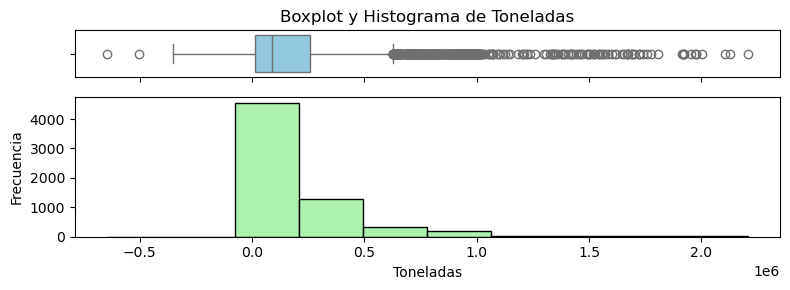

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), sharex=True, gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(x=data_total['Toneladas'], ax=axes[0], orient='h', color='skyblue')
axes[0].set(title='Boxplot y Histograma de Toneladas')
axes[0].set(xlabel='')

# Histograma en la fila inferior
sns.histplot(data_total['Toneladas'], bins=10, kde=False, ax=axes[1], color='lightgreen')
axes[1].set(xlabel='Toneladas', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

C:\Users\chuby\AppData\Local\Temp\ipykernel_8212\3593251429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Categoría', x='Toneladas', data=data_total, ax=axes[0], orient='h', palette='pastel')


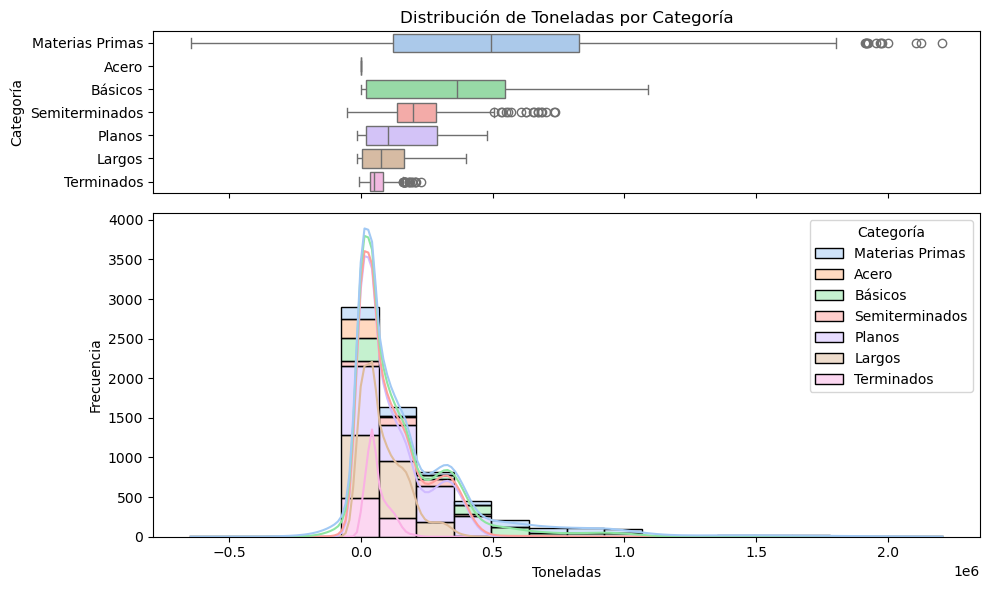

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [1.5, 3]})

#Boxplot
sns.boxplot(y='Categoría', x='Toneladas', data=data_total, ax=axes[0], orient='h', palette='pastel')
axes[0].set(title='Distribución de Toneladas por Categoría')
axes[0].set(xlabel='')

# Histograma
sns.histplot(data=data_total, x='Toneladas', hue='Categoría', ax=axes[1], bins=20, kde=True, palette='pastel', multiple='stack')
axes[1].set(xlabel='Toneladas', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

C:\Users\chuby\AppData\Local\Temp\ipykernel_8212\937804552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Mes', x='Toneladas', data=data_total, ax=axes[0], orient='h', palette='pastel')


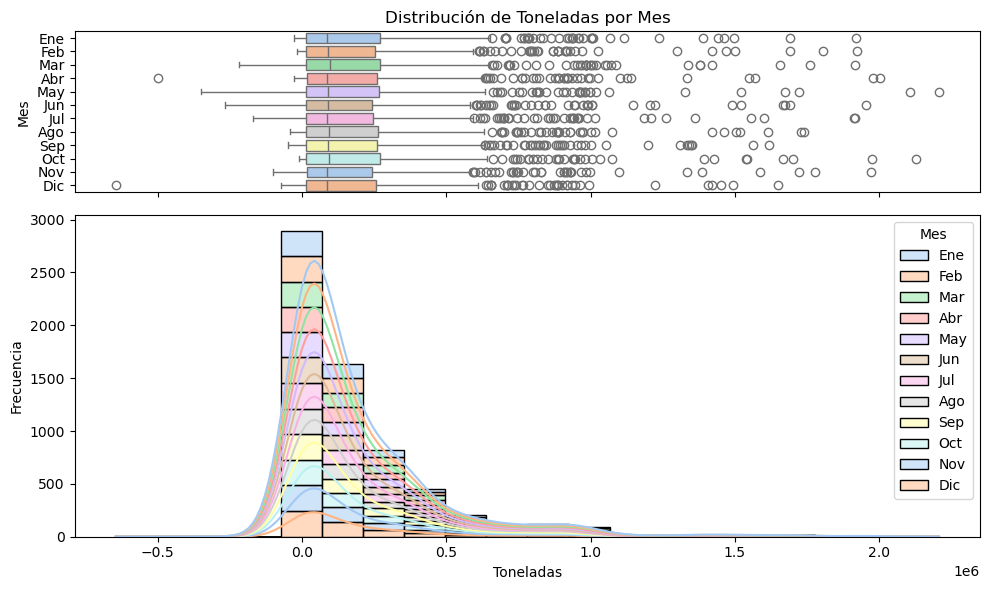

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [1.5, 3]})

#Boxplot
sns.boxplot(y='Mes', x='Toneladas', data=data_total, ax=axes[0], orient='h', palette='pastel')
axes[0].set(title='Distribución de Toneladas por Mes')
axes[0].set(xlabel='')

# Histograma
sns.histplot(data=data_total, x='Toneladas', hue='Mes', ax=axes[1], bins=20, kde=True, palette='pastel', multiple='stack')
axes[1].set(xlabel='Toneladas', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

C:\Users\chuby\AppData\Local\Temp\ipykernel_8212\1150180304.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Año', x='Toneladas', data=data_total, ax=axes[0], orient='h', palette='pastel')


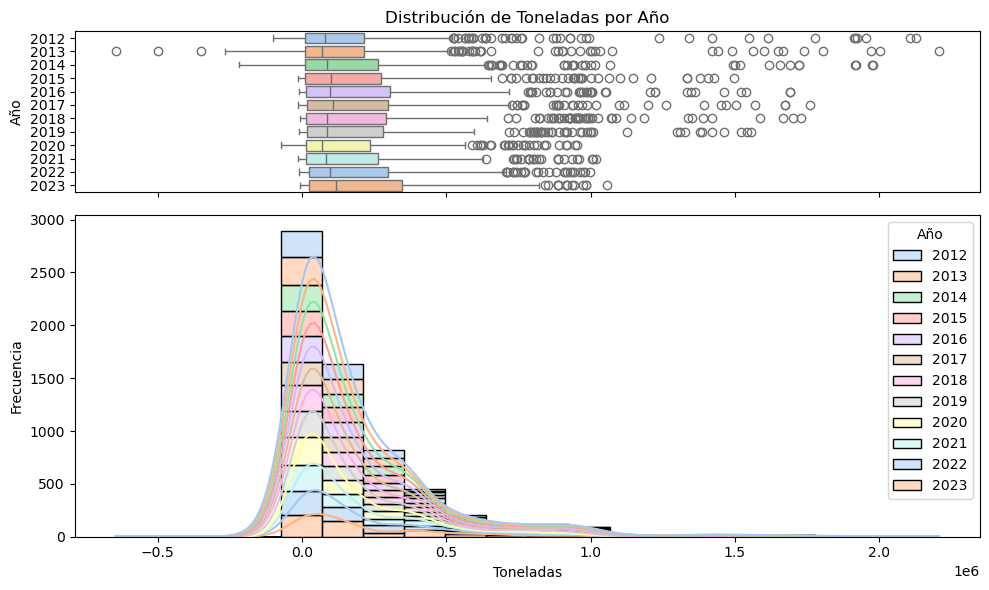

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [1.5, 3]})

#Boxplot
sns.boxplot(y='Año', x='Toneladas', data=data_total, ax=axes[0], orient='h', palette='pastel')
axes[0].set(title='Distribución de Toneladas por Año')
axes[0].set(xlabel='')

# Histograma
sns.histplot(data=data_total, x='Toneladas', hue='Año', ax=axes[1], bins=20, kde=True, palette='pastel', multiple='stack')
axes[1].set(xlabel='Toneladas', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

C:\Users\chuby\AppData\Local\Temp\ipykernel_8212\321034566.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='fecha', y='Toneladas', data=data_total, marker='o',ci = None)


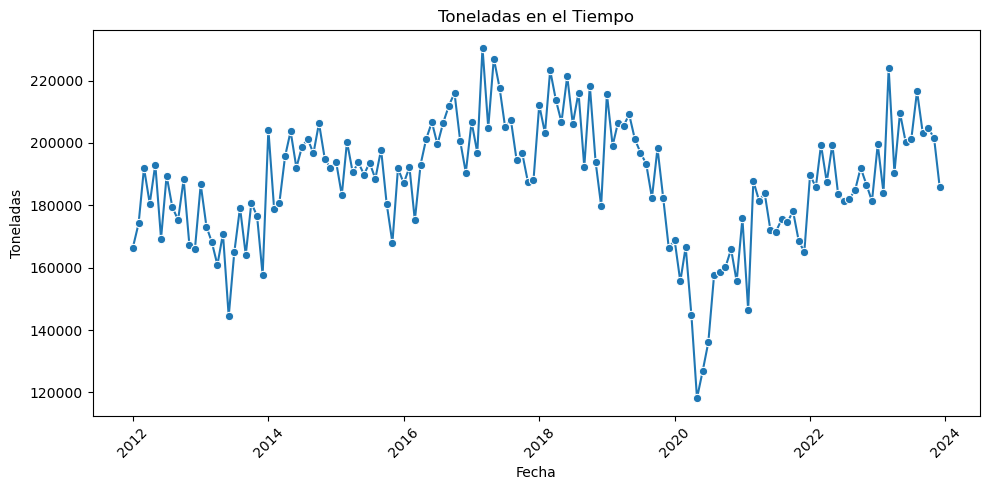

In [47]:
meses = {
    'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12
}

# Convertir mes a número
data_total['mes_num'] = data_total['Mes'].map(meses)

# Crear columna de fecha tipo datetime (año-mes-01)
data_total['fecha'] = pd.to_datetime(dict(year=data_total['Año'], month=data_total['mes_num'], day=1))

# Ordenar por fecha
data_total = data_total.sort_values('fecha')
df_agrupado = data_total.groupby('fecha')['Toneladas'].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 5))
sns.lineplot(x='fecha', y='Toneladas', data=data_total, marker='o',ci = None)
plt.title('Toneladas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Toneladas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

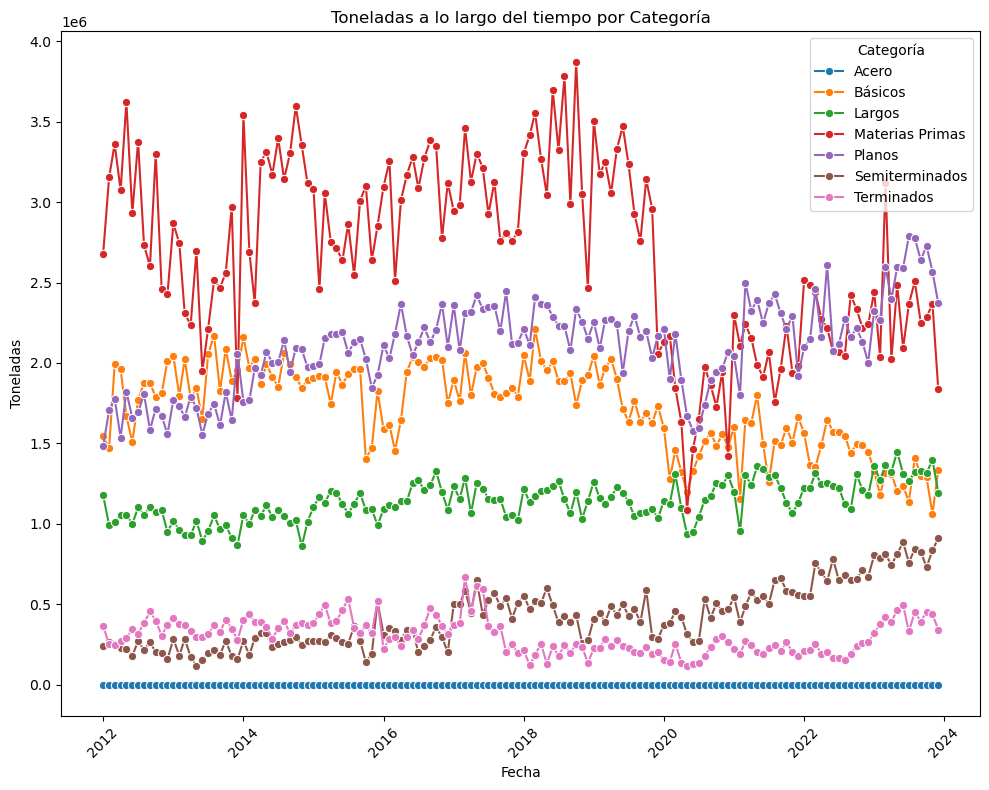

In [48]:
df_agrupado = data_total.groupby(['fecha', 'Categoría'])['Toneladas'].sum().reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(x='fecha', y='Toneladas', hue='Categoría', data=df_agrupado, marker='o')
plt.title('Toneladas a lo largo del tiempo por Categoría')
plt.xlabel('Fecha')
plt.ylabel('Toneladas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
def make_plots_cualitativas(data_total):
    df2=data_total.copy()
    cat_vars = ['Categoría', 'Producto']

    for var in cat_vars:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        # Diagrama de barras
        sns.countplot(x=var, data=df2, ax=axs[0], palette='pastel')
        axs[0].set_title(f'Distribución de {var}')
        axs[0].tick_params(axis='x', rotation=45)

        # Diagrama de pastel
        df2[var].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=sns.color_palette('pastel'))
        axs[1].set_ylabel('')
        axs[1].set_title(f'Proporción de {var}')

        plt.tight_layout()
        plt.show()

C:\Users\chuby\AppData\Local\Temp\ipykernel_8212\3909777786.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df2, ax=axs[0], palette='pastel')


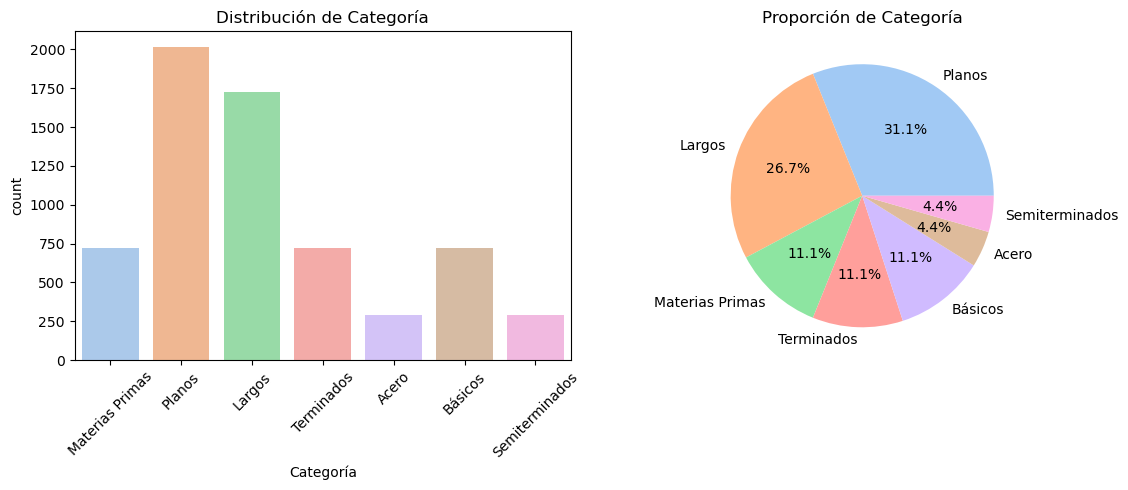

C:\Users\chuby\AppData\Local\Temp\ipykernel_8212\3909777786.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df2, ax=axs[0], palette='pastel')


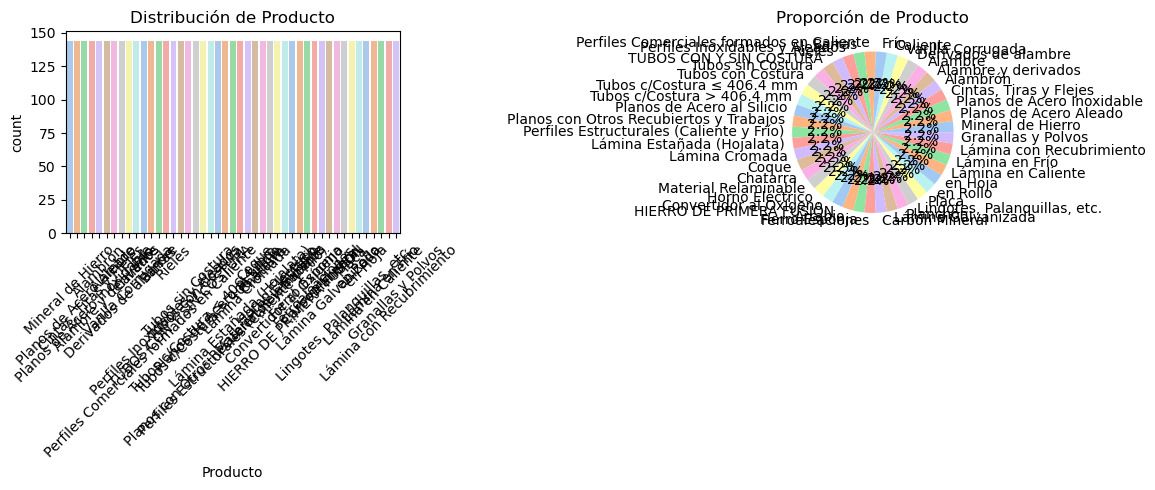

In [50]:
make_plots_cualitativas(data_total)

In [51]:
def agregar_columna_fecha(df):
    """Convierte columnas 'Año' y 'Mes' en una columna Period 'Fecha' (formato año-mes), colocándola como la primera columna."""
    meses = {
        'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4,
        'May': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
        'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12
    }
    df = df.copy()
    df['Mes_num'] = df['Mes'].map(meses)
    df['Fecha'] = pd.to_datetime(dict(year=df['Año'], month=df['Mes_num'], day=1)).dt.to_period('M')
    df.drop(columns=['Mes_num', 'Año', 'Mes',"fecha","mes_num"], inplace=True)

    # Reordenar columnas para que 'Fecha' sea la primera
    cols = ['Fecha'] + [col for col in df.columns if col != 'Fecha']
    df = df[cols]

    return df

In [52]:
data_fecha = agregar_columna_fecha(data_total)


In [55]:
data_fecha.drop(columns = ["Categoría"], inplace = True)

In [56]:
data_fecha.head()

,Fecha,Producto,Toneladas
1,2012-01,Mineral de Hierro,703658.985377
31,2012-01,Planos de Acero Aleado,71706.360771
32,2012-01,Planos de Acero Inoxidable,40838.926543
33,2012-01,"Cintas, Tiras y Flejes",580.984620
35,2012-01,Alambrón,211396.309279


In [57]:
df_pivot = data_fecha.pivot(index='Fecha', columns='Producto', values='Toneladas')

In [59]:
df_pivot.to_csv("historico_cna.csv")